In [1]:
# 경로 참조 
# /mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/09.DOTA_crop_box_to_image.py
# data shape (n,d)
# target shape (n,)


In [39]:
import os
from glob import glob
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img_f = "/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images"
img_fs = os.path.join(img_f,"*.png")
img_fs_ = sorted(glob(img_fs))

In [19]:
img_fs_

['/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_0_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_10_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_11_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_12_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_13_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_14_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_15_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_16_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_17_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img_0_instance_18_.png',
 '/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset_chips/v2/images/crops_img

In [54]:
# pad with an image 

import torchvision.transforms.functional as F

class Resize_with_pad:
    def __init__(self, w=300, h=300):
        self.w = w
        self.h = h

    def __call__(self, image):

        w_1, h_1 = image.size
        ratio_f = self.w / self.h
        ratio_1 = w_1 / h_1


        # check if the original and final aspect ratios are the same within a margin
        if round(ratio_1, 2) != round(ratio_f, 2):

            # padding to preserve aspect ratio
            hp = int(w_1/ratio_f - h_1)
            wp = int(ratio_f * h_1 - w_1)
            if hp > 0 and wp < 0:
                hp = hp // 2
                image = F.pad(image, (0, hp, 0, hp), 0, "constant")
                return F.resize(image, [self.h, self.w])

            elif hp < 0 and wp > 0:
                wp = wp // 2
                image = F.pad(image, (wp, 0, wp, 0), 0, "constant")
                return F.resize(image, [self.h, self.w])

        else:
            return F.resize(image, [self.h, self.w])
#--
Resize_with_pad_ = Resize_with_pad()

In [59]:
sample_img = Image.open(img_fs_[0])

In [64]:
output_img = Resize_with_pad_(sample_img)

In [65]:
output = np.asarray(output_img)

In [66]:
output.shape

(300, 300, 3)

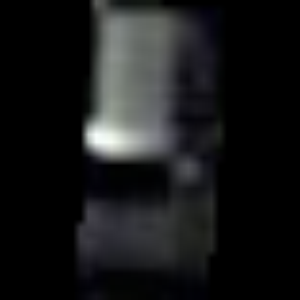

In [67]:
output_img

In [22]:
sizes=[]
for im in img_fs_:
    img_ = Image.open(im)
    sizes.append(img_.size)

In [29]:
xs = []
ys = []
for e in sizes:
    xs.append(e[0])
    ys.append(e[1])

In [34]:
np.mean(xs)

33.568015525048516

In [35]:
np.mean(ys)

35.35874362107381

In [36]:
np.max(xs)

2402

In [38]:
np.max(ys)

1543

(0.0, 500.0)

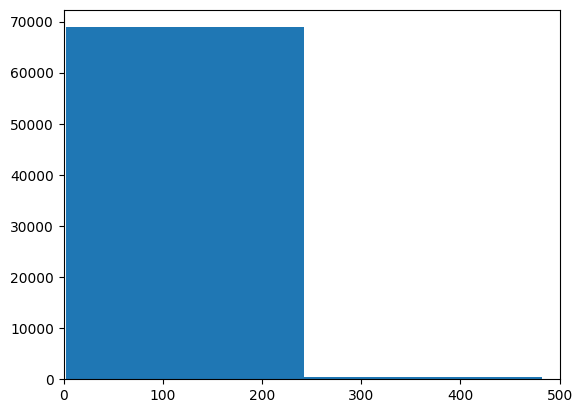

In [46]:
plt.hist(xs)
plt.xlim(0,500)

(0.0, 500.0)

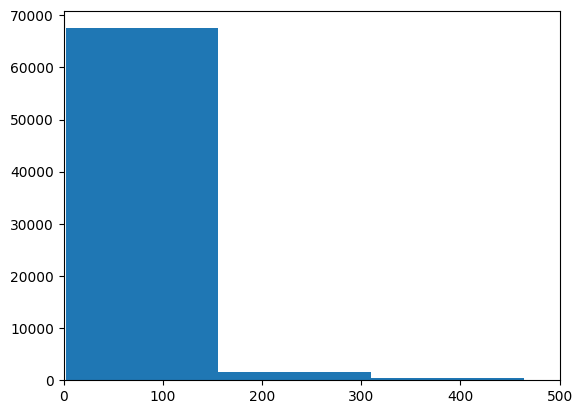

In [47]:
plt.hist(ys)
plt.xlim(0,500)

In [12]:
# resize with padding ! 

In [9]:
# image size distribution analysis
!pip install eotdl

In [10]:
!eotdl datasets get AI4EO-MapYourCity

Dataset `AI4EO-MapYourCity v1` already exists at /mnt/hdd/eric/.cache/eotdl/datasets/AI4EO-MapYourCity/v1. To force download, use force=True or -f in the CLI.


In [13]:
!ls /mnt/hdd/eric/.cache/eotdl/datasets/AI4EO-MapYourCity/v1

building-age-dataset.tar  README.md


In [14]:
!mv /mnt/hdd/eric/.cache/eotdl/datasets/AI4EO-MapYourCity/v1/building-age-dataset.tar /mnt/hdd/eric/.tmp_ipy/00.Data/Map_Your_City/

In [16]:
!tar -xvf /mnt/hdd/eric/.tmp_ipy/00.Data/Map_Your_City/building-age-dataset.tar -C /mnt/hdd/eric/.tmp_ipy/00.Data/Map_Your_City

building-age-dataset/
building-age-dataset/Readme.md
building-age-dataset/test.zip
building-age-dataset/train.zip.001
building-age-dataset/train.zip.002
building-age-dataset/train.zip.003
building-age-dataset/train.zip.004
building-age-dataset/train.zip.005
building-age-dataset/train.zip.006
